In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.getcwd() + '\Downloads\data_nb\ex1data1.txt'
data = pd.read_csv(path, header = None, names= ['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.count()

Population    97
Profit        97
dtype: int64

In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


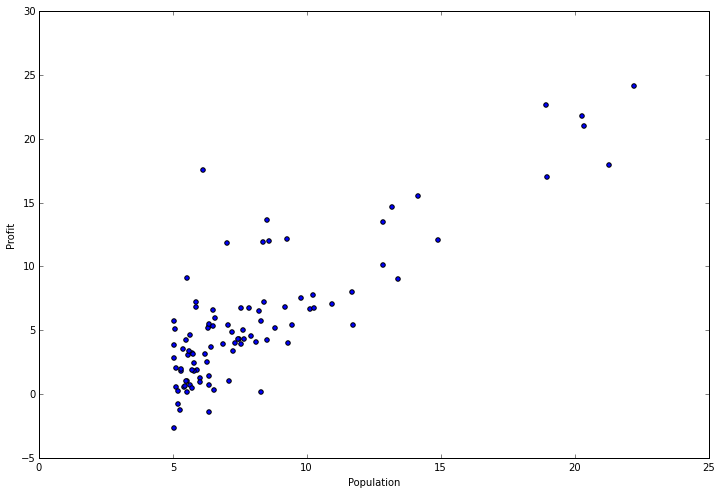

In [5]:
data.plot(kind = 'scatter', x = 'Population', y ='Profit', figsize = (12,8))

In [6]:
def Cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))


In [7]:
data.insert(0,'Ones',1)

In [8]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [9]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [10]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [11]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [12]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [13]:
X

matrix([[  1.    ,   6.1101],
        [  1.    ,   5.5277],
        [  1.    ,   8.5186],
        [  1.    ,   7.0032],
        [  1.    ,   5.8598],
        [  1.    ,   8.3829],
        [  1.    ,   7.4764],
        [  1.    ,   8.5781],
        [  1.    ,   6.4862],
        [  1.    ,   5.0546],
        [  1.    ,   5.7107],
        [  1.    ,  14.164 ],
        [  1.    ,   5.734 ],
        [  1.    ,   8.4084],
        [  1.    ,   5.6407],
        [  1.    ,   5.3794],
        [  1.    ,   6.3654],
        [  1.    ,   5.1301],
        [  1.    ,   6.4296],
        [  1.    ,   7.0708],
        [  1.    ,   6.1891],
        [  1.    ,  20.27  ],
        [  1.    ,   5.4901],
        [  1.    ,   6.3261],
        [  1.    ,   5.5649],
        [  1.    ,  18.945 ],
        [  1.    ,  12.828 ],
        [  1.    ,  10.957 ],
        [  1.    ,  13.176 ],
        [  1.    ,  22.203 ],
        [  1.    ,   5.2524],
        [  1.    ,   6.5894],
        [  1.    ,   9.2482],
        [ 

In [14]:
X.shape, theta.shape, y.shape

((97L, 2L), (1L, 2L), (97L, 1L))

In [15]:
Cost(X,y, theta)

32.072733877455676

In [19]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    params = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        errors = (X * theta.T )- y
        
        for j in range(params):
            term = np.multiply(errors, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = Cost(X,y ,theta)
    return theta, cost


In [17]:
alpha = 0.01
iters = 1000

In [20]:
g, cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [21]:
cost

array([ 6.73719046,  5.93159357,  5.90115471,  5.89522859,  5.89009494,
        5.88500416,  5.87993248,  5.87487909,  5.86984391,  5.86482687,
        5.85982789,  5.85484692,  5.84988389,  5.84493874,  5.8400114 ,
        5.83510181,  5.8302099 ,  5.82533562,  5.82047889,  5.81563965,
        5.81081784,  5.8060134 ,  5.80122627,  5.79645638,  5.79170367,
        5.78696808,  5.78224955,  5.77754801,  5.77286341,  5.76819568,
        5.76354477,  5.75891061,  5.75429313,  5.7496923 ,  5.74510803,
        5.74054027,  5.73598897,  5.73145406,  5.72693549,  5.72243319,
        5.71794711,  5.71347718,  5.70902336,  5.70458558,  5.70016379,
        5.69575792,  5.69136792,  5.68699373,  5.6826353 ,  5.67829257,
        5.67396548,  5.66965398,  5.665358  ,  5.6610775 ,  5.65681242,
        5.6525627 ,  5.64832829,  5.64410913,  5.63990517,  5.63571635,
        5.63154261,  5.62738391,  5.6232402 ,  5.6191114 ,  5.61499748,
        5.61089837,  5.60681403,  5.60274441,  5.59868944,  5.59

In [22]:
Cost(X,y,g)

4.5159555030789118

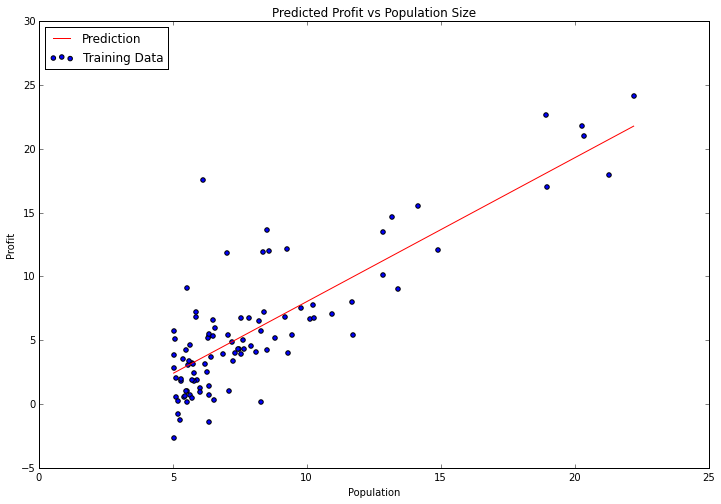

In [24]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0] + (g[0,1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')

ax.scatter(data.Population, data.Profit, label = 'Training Data')
ax.legend(loc = 2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs Population Size')

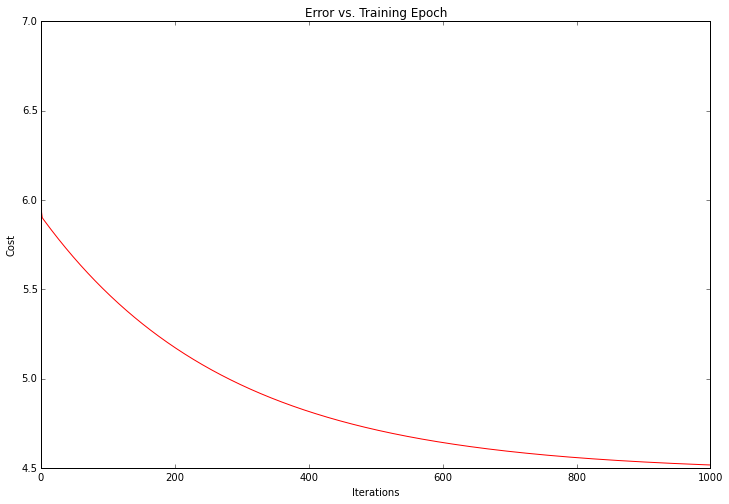

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters), cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [27]:
path = os.getcwd() + '\Downloads\data_nb\ex1data2.txt'
data2 = pd.read_csv(path, header = None, names = ['Size', 'Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [28]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [29]:
data2 = (data2 - data2.mean()) /data2.std()

In [30]:
data2

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [32]:
data2.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [33]:
data2.insert(0,'Ones',1)

In [37]:
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:, cols-1: cols]

X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

Cost(X2,y2,g2)

0.13070336960771892

In [38]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
x = np.array(X[:,1].A1)

In [40]:
x

array([  6.1101,   5.5277,   8.5186,   7.0032,   5.8598,   8.3829,
         7.4764,   8.5781,   6.4862,   5.0546,   5.7107,  14.164 ,
         5.734 ,   8.4084,   5.6407,   5.3794,   6.3654,   5.1301,
         6.4296,   7.0708,   6.1891,  20.27  ,   5.4901,   6.3261,
         5.5649,  18.945 ,  12.828 ,  10.957 ,  13.176 ,  22.203 ,
         5.2524,   6.5894,   9.2482,   5.8918,   8.2111,   7.9334,
         8.0959,   5.6063,  12.836 ,   6.3534,   5.4069,   6.8825,
        11.708 ,   5.7737,   7.8247,   7.0931,   5.0702,   5.8014,
        11.7   ,   5.5416,   7.5402,   5.3077,   7.4239,   7.6031,
         6.3328,   6.3589,   6.2742,   5.6397,   9.3102,   9.4536,
         8.8254,   5.1793,  21.279 ,  14.908 ,  18.959 ,   7.2182,
         8.2951,  10.236 ,   5.4994,  20.341 ,  10.136 ,   7.3345,
         6.0062,   7.2259,   5.0269,   6.5479,   7.5386,   5.0365,
        10.274 ,   5.1077,   5.7292,   5.1884,   6.3557,   9.7687,
         6.5159,   8.5172,   9.1802,   6.002 ,   5.5204,   5.0

In [41]:
f = model.predict(X).flatten()

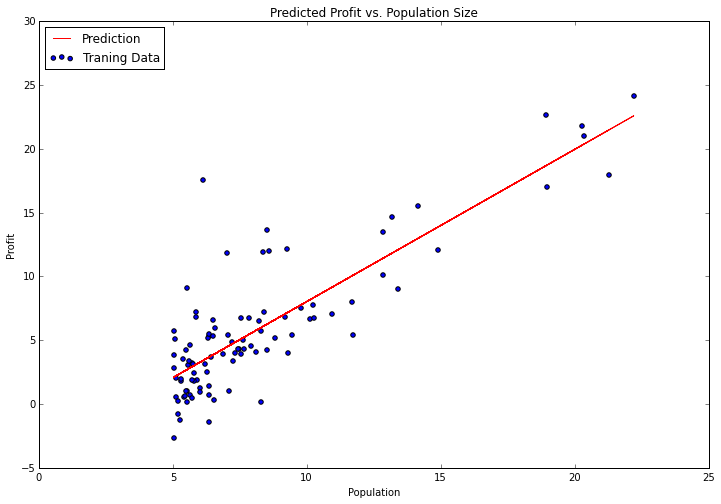

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

In [43]:
# EXERCISE 2

In [47]:
import os
path = os.getcwd() + '\Downloads\data_nb\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


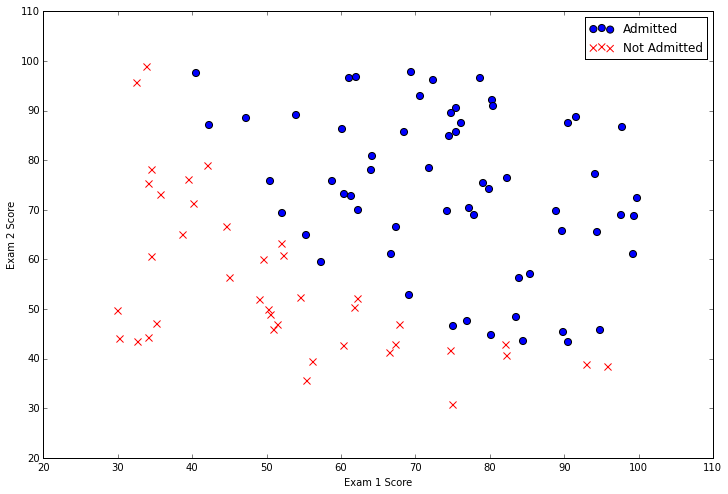

In [50]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [51]:
def sigmoid(z):
    return 1 /(1 + np.exp(-z))


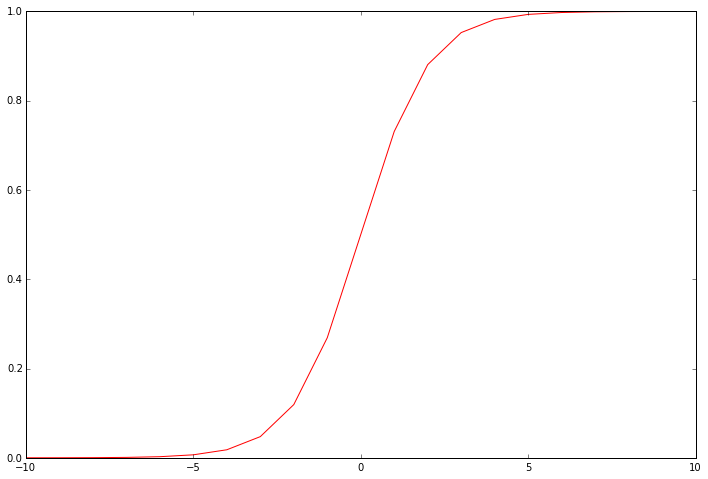

In [52]:
nums = np.arange(-10,10,step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

In [53]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1-y), np.log(1- sigmoid(X * theta.T)))
    return np.sum(first - second)/ len(X)

    

In [54]:

data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]


X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [55]:
X.shape, y.shape, theta.shape

((100L, 3L), (100L, 1L), (3L,))

In [56]:
cost(theta,X,y)

0.69314718055994529

In [59]:

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [60]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [61]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0 = theta, fprime = gradient, args = (X,y))
result

(array([-25.87355616,   0.21193682,   0.20722586]), 51, 1)

In [62]:
cost(result[0], X,y)

0.20357134410602434

In [63]:
def predict(theta, X):
    prob = sigmoid(X * theta.T)
    return[1 if x > 0.5 else 0 for x in prob]

In [64]:
theta_min  = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))

accuracy


89

In [65]:
path = os.getcwd() + '\Downloads\data_nb\ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


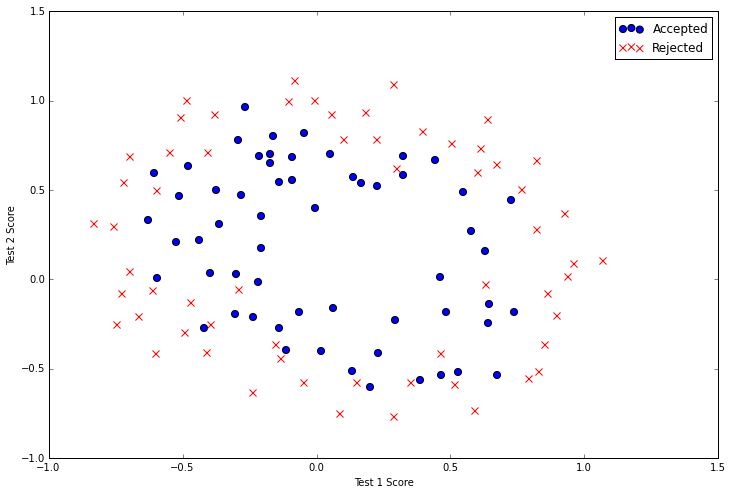

In [66]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [67]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3,'Ones',1)

for i in range(1, degree):
    for j in range(0,i):
        data2['F' + str(i) + str(j)] = np.power(x1,i-j) * np.power(x2,j)

data2.drop('Test 1', axis = 1, inplace = True)
data2.drop('Test 2', axis = 1, inplace = True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [68]:
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [69]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [70]:
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)


In [71]:
learningRate = 1

In [72]:
costReg(theta2, X2, y2, learningRate)

0.6931471805599454

In [73]:
gradientReg(theta2, X2, y2, learningRate)

array([ 0.00847458,  0.01878809,  0.05034464,  0.01150133,  0.01835599,
        0.00732393,  0.00819244,  0.03934862,  0.00223924,  0.01286005,
        0.00309594])

In [74]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([  0.35874543,  -3.22180063,  18.97094931,  -4.25276072,
         18.2298687 ,  20.36463083,   8.94171923, -43.77414345,
        -17.93485929, -50.75160656,  -2.84273071]), 110, 1)

In [75]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print 'accuracy = {0}%'.format(accuracy)

accuracy = 91%


In [76]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C = 1.0)
model.fit(X2,y2.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [77]:
model.score(X2,y2)

0.66101694915254239

In [78]:
#Exercise 3

In [79]:
from scipy.io import loadmat

In [81]:
data = loadmat('Downloads/data_nb/ex3data1.mat')
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [82]:
data['X'].shape, data['y'].shape

((5000L, 400L), (5000L, 1L))

In [94]:
def gradient(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    error = sigmoid(X * theta.T) - y
    
    grad = ((X.T * error) / len(X)).T + ((learningRate / len(X)) * theta)
    
    # intercept gradient is not regularized
    grad[0, 0] = np.sum(np.multiply(error, X[:,0])) / len(X)
    
    return np.array(grad).ravel()


In [95]:
from scipy.optimize import minimize 

def one_vs_all(X, y, num_labels, learning_rate):
    rows = X.shape[0]
    params = X.shape[1]
    
    # k X (n + 1) array for the parameters of each of the k classifiers
    all_theta = np.zeros((num_labels, params + 1))
    
    # insert a column of ones at the beginning for the intercept term
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    
    # labels are 1-indexed instead of 0-indexed
    for i in range(1, num_labels + 1):
        theta = np.zeros(params + 1)
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.reshape(y_i, (rows, 1))
        
        # minimize the objective function
        fmin = minimize(fun=cost, x0=theta, args=(X, y_i, learning_rate), method='TNC', jac=gradient)
        all_theta[i-1,:] = fmin.x
    
    return all_theta


In [96]:
def predict_all(X, all_theta):
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = all_theta.shape[0]
    
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    
    X = np.matrix(X)
    all_theta = np.matrix(all_theta)
   
    h = sigmoid(X * all_theta.T)
  
    h_argmax = np.argmax(h, axis=1)
 
    h_argmax = h_argmax + 1
    
    return h_argmax

In [99]:
y_pred = predict_all(data['X'], all_theta)
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, data['y'])]
accuracy = (sum(map(int, correct)) / float(len(correct)))
print 'accuracy = {0}%'.format(accuracy * 100)

accuracy = 97.58%


In [97]:
all_theta = one_vs_all(data['X'], data['y'], 10, 1)
all_theta

array([[ -5.79312170e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.22140973e-02,   2.88611969e-07,   0.00000000e+00],
       [ -4.91685285e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.40449128e-01,  -1.08488270e-02,   0.00000000e+00],
       [ -8.56840371e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -2.59241796e-04,  -1.12756844e-06,   0.00000000e+00],
       ..., 
       [ -1.32641613e+01,   0.00000000e+00,   0.00000000e+00, ...,
         -5.63659404e+00,   6.50939114e-01,   0.00000000e+00],
       [ -8.55392716e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -2.01206880e-01,   9.61930149e-03,   0.00000000e+00],
       [ -1.29807876e+01,   0.00000000e+00,   0.00000000e+00, ...,
          2.60651472e-04,   4.22693052e-05,   0.00000000e+00]])

In [92]:
def cost(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [102]:
#Exercise 4 NEural Nets Hahahahaha :D
X = data['X']
y = data['y']

In [103]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
y_onehot = encoder.fit_transform(y)
y_onehot.shape

(5000L, 10L)

In [104]:
y[0], y_onehot[0,:]

(array([10], dtype=uint8),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]))

In [110]:
def forward_propagate(X, theta1, theta2):
    m = X.shape[0]
    
    a1 = np.insert(X, 0, values=np.ones(m), axis=1)
    z2 = a1 * theta1.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    z3 = a2 * theta2.T
    h = sigmoid(z3)
    
    return a1, z2, a2, z3, h

In [106]:
def cost(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
   
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
   
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    return J

In [108]:
input_size = 400
hidden_size = 25
num_labels = 10
learning_rate = 1

params = (np.random.random(size=hidden_size * (input_size + 1) + num_labels * (hidden_size + 1)) - 0.5) * 0.25

m = X.shape[0]
X = np.matrix(X)
y = np.matrix(y)

theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

theta1.shape, theta2.shape

((25L, 401L), (10L, 26L))

In [111]:
a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
a1.shape, z2.shape, a2.shape, z3.shape, h.shape

((5000L, 401L), (5000L, 25L), (5000L, 26L), (5000L, 10L), (5000L, 10L))

In [112]:
cost(params, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)

7.2884538819685689

In [113]:
def cost(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    

    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
  
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    return J

In [114]:
cost(params, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)

7.2884538819685689

In [115]:
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))

In [116]:
def backprop(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # reshape the parameter array into parameter matrices for each layer
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # initializations
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    
    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    # perform backpropagation
    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)
        
        d3t = ht - yt  # (1, 10)
        
        z2t = np.insert(z2t, 0, values=np.ones(1))  # (1, 26)
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t))  # (1, 26)
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    # add the gradient regularization term
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, grad

In [117]:
J, grad = backprop(params, input_size, hidden_size, num_labels, X, y_onehot, learning_rate)
J, grad.shape

(7.2884538819685689, (10285L,))

In [118]:
from scipy.optimize import minimize

fmin = minimize(fun=backprop, x0=params, args=(input_size, hidden_size, num_labels, X, y_onehot, learning_rate), 
                method='TNC', jac=True, options={'maxiter': 250})
fmin

KeyboardInterrupt: 

In [ ]:
X = np.matrix(X)
theta1 = np.matrix(np.reshape(fmin.x[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
theta2 = np.matrix(np.reshape(fmin.x[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))

a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
y_pred = np.array(np.argmax(h, axis=1) + 1)
y_pred

In [119]:
correct = [1 if a == b else 0 for (a, b) in zip(y_pred, y)]
accuracy = (sum(map(int, correct)) / float(len(correct)))
accuracy

0.9758

In [120]:
#Exercise 6 : SVM

In [121]:
raw_data = loadmat('Downloads/data_nb/ex6data1.mat')
raw_data

{'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2931  ],
        [ 2.4827  ,  2.0373  ],
        [ 2.5057  ,  2.3853  ],
        [ 1.8721  ,  2.0577  ],
        [ 2.0103  ,  2.3546  ],
   

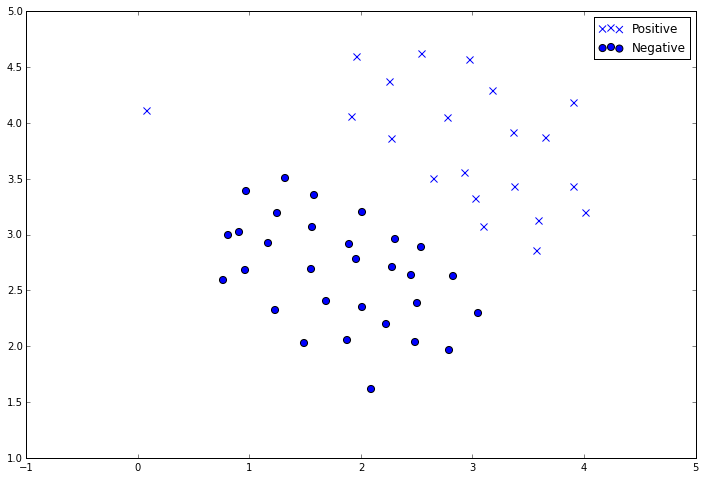

In [124]:
data = pd.DataFrame(raw_data['X'],columns = ['X1','X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'],positive['X2'], s=50, marker = 'x', label = 'Positive')
ax.scatter(negative['X1'],negative['X2'], s=50, marker = 'o', label = 'Negative')
ax.legend()

In [125]:
from sklearn import svm 
svc = svm.LinearSVC(C=1, loss='hinge', max_iter = 1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [127]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.98039215686274506

In [130]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

1.0

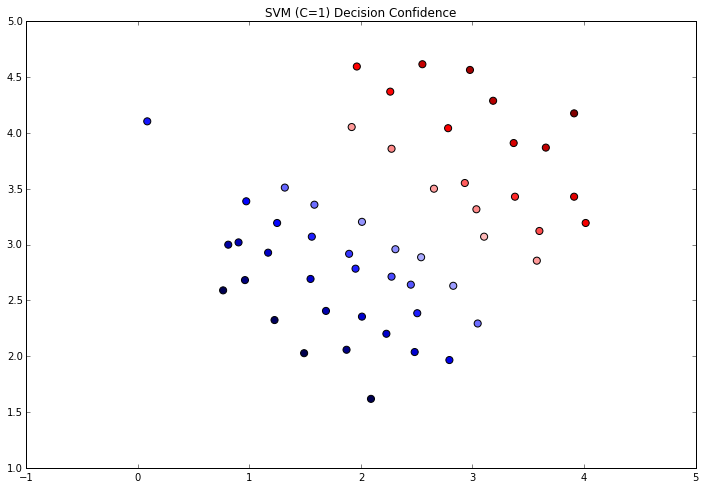

In [131]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1','X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

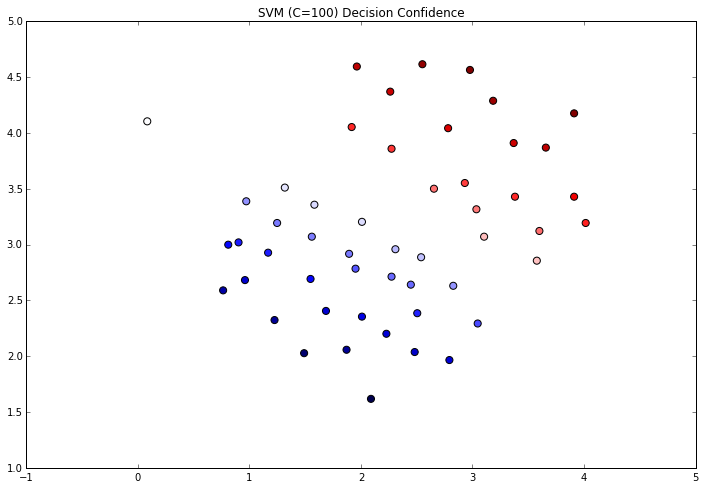

In [132]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')

In [133]:
def gaussian_kernel(x1,x2,sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [134]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

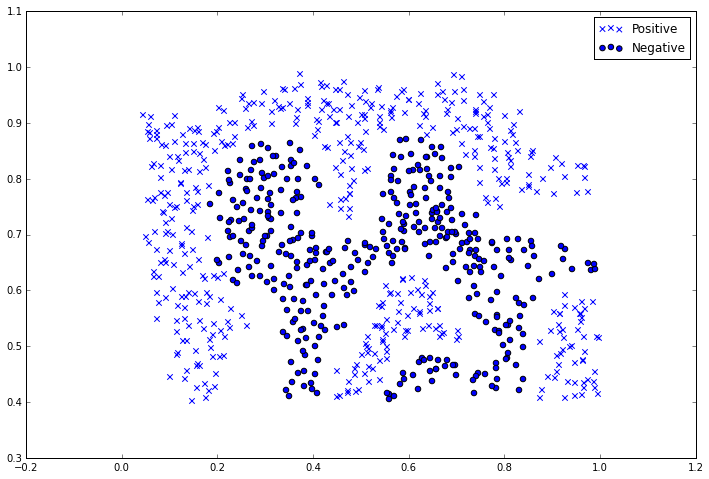

In [135]:
raw_data = loadmat('Downloads/data_nb/ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

In [136]:
svc = svm.SVC(C = 100, gamma =10, probability = True)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=10,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [137]:
svc.fit(data[['X1','X2']], data['y'])
svc.score(data[['X1','X2']], data['y'])

0.9698725376593279

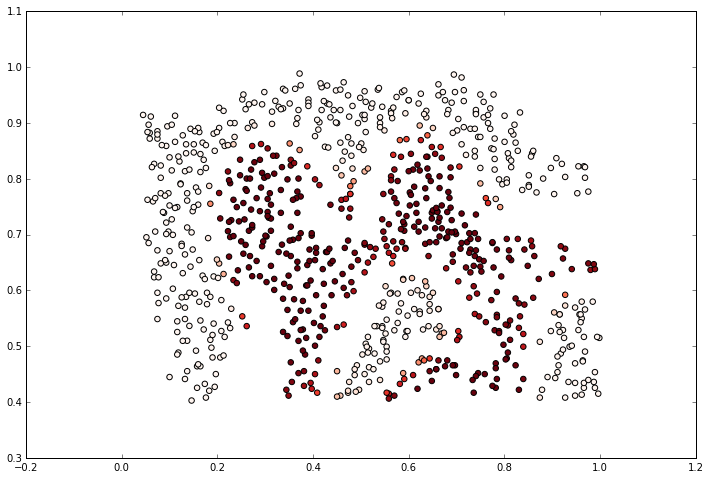

In [139]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')

In [140]:
raw_data = loadmat('Downloads/data_nb/ex6data3.mat')
X = raw_data['X']
Xval=raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()


C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params


(0.96499999999999997, {'C': 0.3, 'gamma': 100})

In [141]:
spam_train = loadmat('Downloads/data_nb/spamTrain.mat')
spam_test = loadmat('Downloads/data_nb/spamTest.mat')

In [142]:
X = spam_train['X']
Xtest = spam_test['Xtest']

y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape, ytest.shape

((4000L, 1899L), (4000L,), (1000L, 1899L), (1000L,))

In [143]:
svc = svm.SVC()
svc.fit(X,y)

svc.score(X,y)

0.94399999999999995

In [144]:
svc.score(Xtest,ytest)

0.95299999999999996

In [145]:
#Exercise 7

In [146]:
def find_closest_centroids(X,centroids):
    m=X.shape[0]
    k=centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) **2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx


In [148]:
data =loadmat('Downloads/data_nb/ex7data2.mat')
X = data['X']
initial_centroids = initial_centroids = np.array([[3,3],[6,2],[8,5]])

idx = find_closest_centroids(X,initial_centroids)
idx[0:3]

array([ 0.,  2.,  1.])

In [151]:
def compute_centroids(X,idx,k):
    m,n = X.shape
    centroids = np.zeros((k,n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis = 1) / len(indices[0])).ravel()
        
    return centroids

In [152]:
compute_centroids(X,idx,3)

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [155]:
def run_k_means(X,initial_centroids, max_iters):
    m,n =X.shape
    k=initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X,centroids)
        centroids = compute_centroids(X,idx,k)
    return idx, centroids


In [156]:
idx, centroids = run_k_means(X,initial_centroids,10)

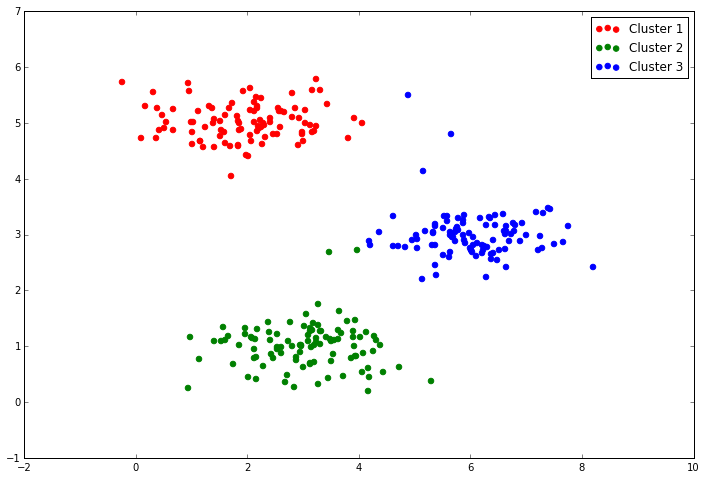

In [157]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

In [158]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i,:] = X[idx[i],:]
    
    return centroids

In [159]:
init_centroids(X,3)

array([[ 4.18450011,  0.45356203],
       [ 3.94159139,  0.82577438],
       [ 5.29239452,  0.36873298]])

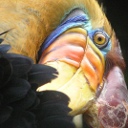

In [161]:
from IPython.display import Image
Image(filename = 'Downloads/data_nb/bird_small.png')

In [162]:
image_data = loadmat('Downloads/data_nb/bird_small.mat')
image_data

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ..., 
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ..., 
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ..., 
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ..., 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ..., 
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ..., 
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ..., 
         [ 65,  43

In [163]:
A = image_data['A']
A.shape

(128L, 128L, 3L)

In [164]:
A = A/255

X =np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))

X.shape

(16384L, 3L)

In [170]:
# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]
X_recovered.shape

(16384L, 3L)

In [171]:
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128L, 128L, 3L)

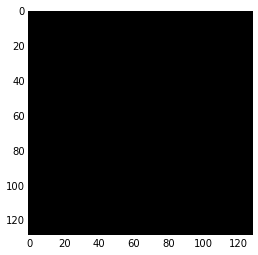

In [172]:
plt.imshow(X_recovered)

In [173]:
#PCA

In [174]:
data = loadmat('Downloads/data_nb/ex7data1.mat')
data

{'X': array([[ 3.38156267,  3.38911268],
        [ 4.52787538,  5.8541781 ],
        [ 2.65568187,  4.41199472],
        [ 2.76523467,  3.71541365],
        [ 2.84656011,  4.17550645],
        [ 3.89067196,  6.48838087],
        [ 3.47580524,  3.63284876],
        [ 5.91129845,  6.68076853],
        [ 3.92889397,  5.09844661],
        [ 4.56183537,  5.62329929],
        [ 4.57407171,  5.39765069],
        [ 4.37173356,  5.46116549],
        [ 4.19169388,  4.95469359],
        [ 5.24408518,  4.66148767],
        [ 2.8358402 ,  3.76801716],
        [ 5.63526969,  6.31211438],
        [ 4.68632968,  5.6652411 ],
        [ 2.85051337,  4.62645627],
        [ 5.1101573 ,  7.36319662],
        [ 5.18256377,  4.64650909],
        [ 5.70732809,  6.68103995],
        [ 3.57968458,  4.80278074],
        [ 5.63937773,  6.12043594],
        [ 4.26346851,  4.68942896],
        [ 2.53651693,  3.88449078],
        [ 3.22382902,  4.94255585],
        [ 4.92948801,  5.95501971],
        [ 5.79295774,  

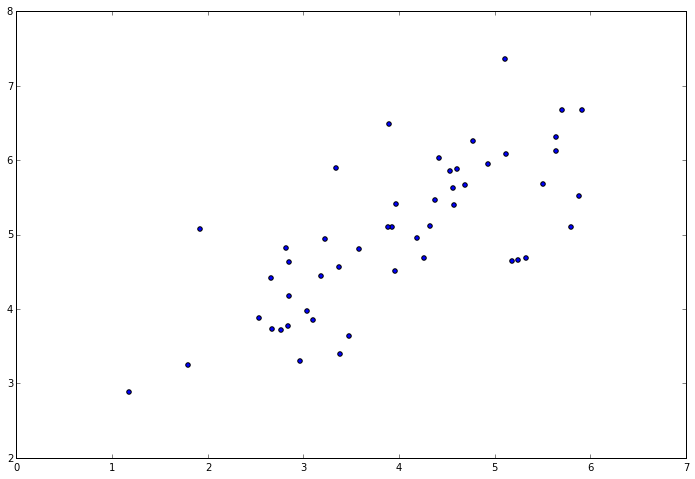

In [175]:
X = data['X']
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])

In [176]:
def pca(X):

    X = (X - X.mean()) / X.std()
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [177]:
X.shape[0]

50L

In [178]:
U, S, V = pca(X)
U, S, V

(matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]),
 array([ 1.43584536,  0.56415464]),
 matrix([[-0.79241747, -0.60997914],
         [-0.60997914,  0.79241747]]))

In [179]:
def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

In [180]:
Z = project_data(X,U,1)
Z

matrix([[-4.74689738],
        [-7.15889408],
        [-4.79563345],
        [-4.45754509],
        [-4.80263579],
        [-7.04081342],
        [-4.97025076],
        [-8.75934561],
        [-6.2232703 ],
        [-7.04497331],
        [-6.91702866],
        [-6.79543508],
        [-6.3438312 ],
        [-6.99891495],
        [-4.54558119],
        [-8.31574426],
        [-7.16920841],
        [-5.08083842],
        [-8.54077427],
        [-6.94102769],
        [-8.5978815 ],
        [-5.76620067],
        [-8.2020797 ],
        [-6.23890078],
        [-4.37943868],
        [-5.56947441],
        [-7.53865023],
        [-7.70645413],
        [-5.17158343],
        [-6.19268884],
        [-6.24385246],
        [-8.02715303],
        [-4.81235176],
        [-7.07993347],
        [-5.45953289],
        [-7.60014707],
        [-4.39612191],
        [-7.82288033],
        [-3.40498213],
        [-6.54290343],
        [-7.17879573],
        [-5.22572421],
        [-4.83081168],
        [-7

In [181]:
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

In [182]:
X_recovered = recover_data(Z, U, 1)
X_recovered

matrix([[ 3.76152442,  2.89550838],
        [ 5.67283275,  4.36677606],
        [ 3.80014373,  2.92523637],
        [ 3.53223661,  2.71900952],
        [ 3.80569251,  2.92950765],
        [ 5.57926356,  4.29474931],
        [ 3.93851354,  3.03174929],
        [ 6.94105849,  5.3430181 ],
        [ 4.93142811,  3.79606507],
        [ 5.58255993,  4.29728676],
        [ 5.48117436,  4.21924319],
        [ 5.38482148,  4.14507365],
        [ 5.02696267,  3.8696047 ],
        [ 5.54606249,  4.26919213],
        [ 3.60199795,  2.77270971],
        [ 6.58954104,  5.07243054],
        [ 5.681006  ,  4.37306758],
        [ 4.02614513,  3.09920545],
        [ 6.76785875,  5.20969415],
        [ 5.50019161,  4.2338821 ],
        [ 6.81311151,  5.24452836],
        [ 4.56923815,  3.51726213],
        [ 6.49947125,  5.00309752],
        [ 4.94381398,  3.80559934],
        [ 3.47034372,  2.67136624],
        [ 4.41334883,  3.39726321],
        [ 5.97375815,  4.59841938],
        [ 6.10672889,  4.700

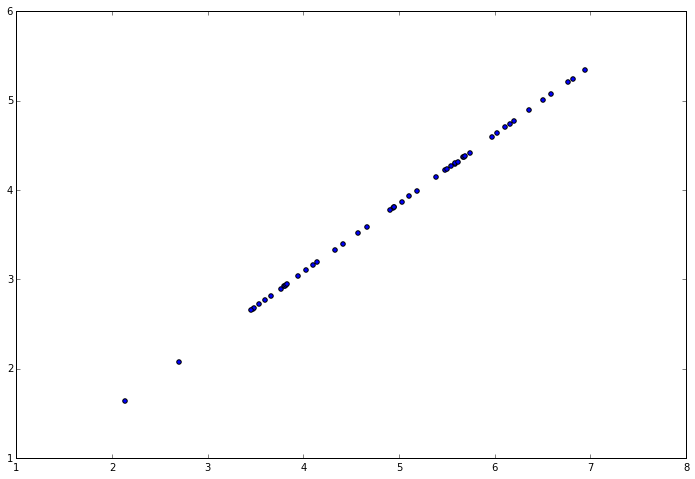

In [183]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_recovered[:, 0], X_recovered[:, 1])

In [184]:
faces = loadmat('Downloads/data_nb/ex7faces.mat')
X = faces['X']
X.shape

(5000L, 1024L)

In [185]:
face = np.reshape(X[3,:], (32, 32))

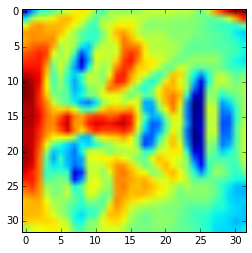

In [186]:
plt.imshow(face)

In [187]:
U, S, V = pca(X)
Z = project_data(X, U, 100)

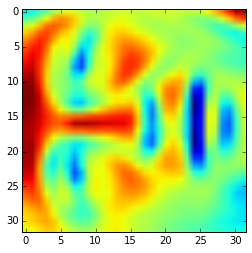

In [188]:
X_recovered = recover_data(Z, U, 100)
face = np.reshape(X_recovered[3,:], (32, 32))
plt.imshow(face)

In [189]:
#Exercise 8


In [190]:
import seaborn as sb

In [191]:
data = loadmat('Downloads/data_nb/ex8data1.mat')
X = data['X']
X.shape

(307L, 2L)

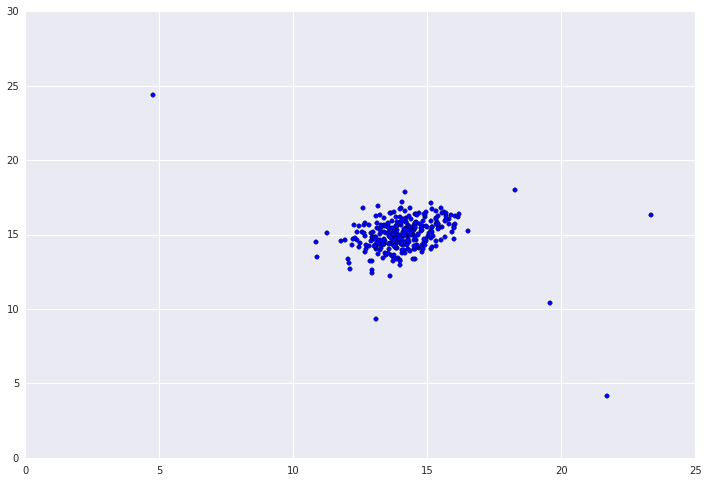

In [192]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])

In [193]:
def estimate_gaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis =0)
    
    return mu,sigma

In [194]:
mu, sigma = estimate_gaussian(X)
mu, sigma

(array([ 14.11222578,  14.99771051]), array([ 1.83263141,  1.70974533]))

In [195]:
Xval = data['Xval']
yval = data['yval']

Xval.shape, yval.shape

((307L, 2L), (307L, 1L))

In [197]:
from scipy import stats
dist =stats.norm(mu[0], sigma[0])
dist.pdf(15)

0.1935875044615038

In [198]:
dist.pdf(X[:,0])[0:50]

array([ 0.183842  ,  0.20221694,  0.21746136,  0.19778763,  0.20858956,
        0.21652359,  0.16991291,  0.15123542,  0.1163989 ,  0.1594734 ,
        0.21716057,  0.21760472,  0.20141857,  0.20157497,  0.21711385,
        0.21758775,  0.21695576,  0.2138258 ,  0.21057069,  0.1173018 ,
        0.20765108,  0.21717452,  0.19510663,  0.21702152,  0.17429399,
        0.15413455,  0.21000109,  0.20223586,  0.21031898,  0.21313426,
        0.16158946,  0.2170794 ,  0.17825767,  0.17414633,  0.1264951 ,
        0.19723662,  0.14538809,  0.21766361,  0.21191386,  0.21729442,
        0.21238912,  0.18799417,  0.21259798,  0.21752767,  0.20616968,
        0.21520366,  0.1280081 ,  0.21768113,  0.21539967,  0.16913173])

In [199]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])

p.shape

(307L, 2L)

In [200]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])

pval.shape

(307L, 2L)

In [201]:
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    step = (pval.max() - pval.min()) / 1000
    
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon
        
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    
    return best_epsilon, best_f1

In [202]:
epsilon, f1 = select_threshold(pval, yval)
epsilon, f1

(0.0095667060059568421, 0.7142857142857143)

In [203]:
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

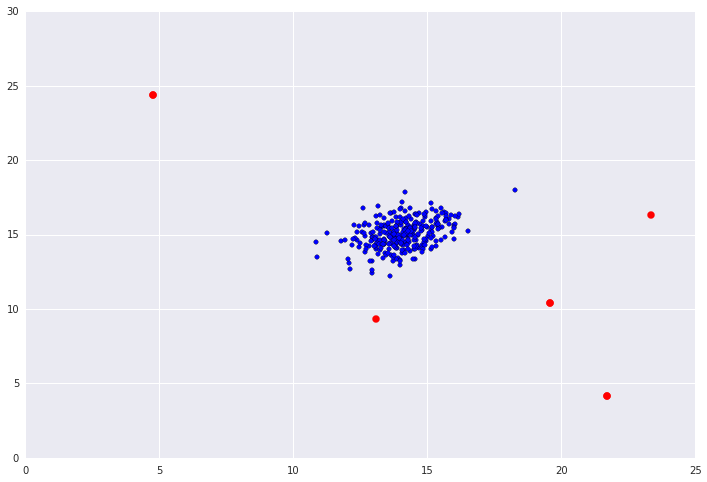

In [204]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')